[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/BMED365-2026/blob/main/labs/Lab0-ML/notebooks/01-Simple_examples.ipynb)


Version 27.11.2025, A. S. Lundervold / A. Lundervold

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](.) &nbsp; [![kaggle](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](.)

In [79]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import google.colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# A first example of machine learning

Welcome to the first step on your hands-on journey into machine learning! In this Jupyter Notebook, we'll use machine learning to study some standard benchmark data sets. 

You can download the notebook from the course GitHub repo: https://github.com/MMIV-ML/ELMED219-2025.

> You'll find some cells marked "Your turn!" below. These are meant to help you experiment with the code. 

> Tip: Always feel free to modify the code, change parameters, or experiment on your own! Hands-on exploration lead to deeper understanding.

This notebook aims to introduce some of the essential ingredients and techniques in machine learning. 

As we've discussed, in traditional programming, we write specific instructions for a computer to follow. In machine learning, instead of providing explicit instructions, we feed data to algorithms, and the algorithms learn from this data. This notebook will make this more concrete.

To get started, we need some data. Here, we'll use a much studied, classical data set: the [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris). Later in the course, we'll look at more complicated (and interesting) data sets. We choose the Iris dataset because it's simple, well-understood, and offers a clear demonstration of classification techniques.

<img src="https://raw.githubusercontent.com/HVL-ML/DAT158/main/notebooks/assets/iris.png">

The task is to predict the Iris flower type, either *Iris-Setosa*, *Iris-Versicolor*, or *Iris-Virginica*, from its sepal and petal lengths and widths ("begerblad" and "kronblad" in Norwegian). 

> Vocabulary: assigning each data point to a class is called **classification**.

> Thought starter: Why might we want a machine to classify flowers for us? Can you think of real-world applications where classification might be crucial?

First, we have to set up our machine learning framework.

# Set up our ML framework

Throughout the course, we'll use several libraries over and over. In particular, <a href="https://www.datacamp.com/community/tutorials/python-numpy-tutorial">NumPy</a> for numerical calculations, <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">pandas</a> for working with tabular data (and more!), and <a href="https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python">matplotlib</a> to create visualizations. *Familiarize yourself with all three!* The above links are to some short tutorials. You'll find additional resources through the course Canvas page.

> In programming, a *library* is like a collection of pre-made tools that help us accomplish specific tasks without having to build everything from scratch. By using libraries, we can save time and utilize the power of community-contributed code.


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

# We set up Matplotlib to display plots directly in the notebook:
%matplotlib inline

> **Your turn:** Read about these and other *magic* commands by running `%magic` in a code cell. You can uncomment the command below and run the cell using `Shift+Enter`.

In [82]:
#%magic

We'll use `scikit-learn`, a powerful and widely-used Python library for machine learning. It provides simple and efficient tools for data analysis and modeling. Whether you're a novice or an expert, `scikit-learn` offers tools that make implementing algorithms and processing data a breeze.


In [83]:
import sklearn

Next, we load, explore, and prepare the Iris data set

# Load, explore and prepare the data

## Load the data

In this section, we'll go through the process of:
1. Loading the dataset.
2. Exploring its features and labels.
3. Understanding its structure.
4. Converting it to a Pandas dataframe for ease of manipulation.


> Collecting and preparing data for data analysis tasks forms a large part of real-world projects. In this case, it's easy. Iris is a standard benchmark data set and comes built in to scikit-learn:

In [84]:
from sklearn.datasets import load_iris

> **Useful tip:** By placing a question mark in front of a Python object you'll get the documentation. (Alternatively, hit `Shift+Tab` in the cell). By using two question marks, you'll get the source code.

In [85]:
#?load_iris

In [86]:
#??load_iris

In [87]:
iris_dataset = load_iris()

The key `DESCR` (short for "DESCRIPTION") gives you a text description of the Iris dataset:


In [88]:
#iris_dataset

In [89]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

List available *features* in the data set:

In [90]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


List available *labels*:

In [91]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


How much data do we have?

In [92]:
iris_dataset['data'].shape

(150, 4)

There are 150 rows and 4 columns of data. Each row is called a *sample*, each column a *feature*. 

The _labels_ of the data points are stored under the key `target`:

In [93]:
iris_dataset['target'].shape

(150,)

...coded as 0, 1, and 2, which correspond to the plants listed in `target_names`. Note: Don't confuse `feature_names` (which lists our input variables like sepal length) with `target_names` (which lists our output labels like Iris-Setosa).


In [94]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 corresponds to Iris-Setosa, 1 to Iris-Versicolor and 2 to Iris-Virginica.

It's often very convenient to use Pandas when working with text-based data sets. In the following cell, we collect all the data in a `Pandas dataframe` (a tabular format):

> DataFrames are a fundamental data structure in Pandas, offering a 2-dimensional, size-mutable, and heterogeneous tabular structure with labeled axes (rows and columns). In simpler terms, it's a way to store data in a table format, similar to an Excel sheet, which makes data manipulation and analysis more intuitive.


In [96]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)

Here are the first ten rows:

In [97]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


It's also convenient to add the labels to each sample:

In [98]:
iris_df['label'] = iris_dataset['target']

In [99]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


> Challenge: Use `matplotlib` to plot some features against others and color-code by label. Can you visually identify any patterns that might make some species distinguishable from others?


> Your turn!: Load another dataset from `sklearn.datasets` and inspect its structure. Can you find the feature names and targets?

Great job! You've successfully loaded the Iris dataset, explored its structure, and transformed it into a more manipulatable format using Pandas. With this understanding, we're now in a good position to dive deeper into machine learning tasks. In the upcoming sections, we'll visualize the data, preprocess the data and then train our first machine learning model!


## Visualize the data

Visualizing your data is not just about making pretty plots. It helps in understanding the relationships between data attributes and provides insights into the distribution and nature of the data, which can significantly impact our modeling decisions.


It's interesting to investigate the _distribution_ of the various features. We can use the plotting functionality of Pandas to create **histograms**. A histogram represents the distribution of a single variable by dividing it into bins and showing the frequency of data points in each bin.


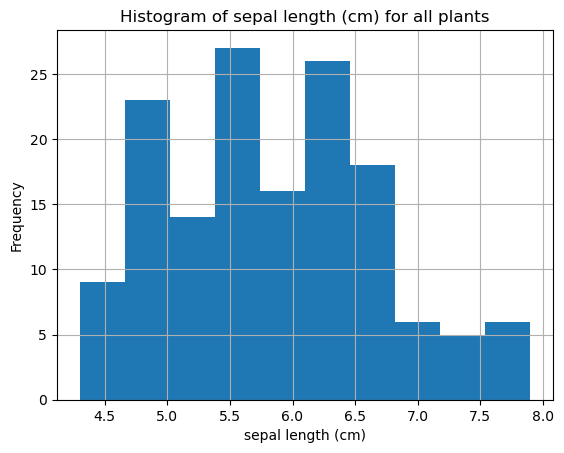

In [100]:
# Set the feature name
feat = 'sepal length (cm)'

# Create a histogram of the specified feature for all the plants
fig, ax = plt.subplots()
iris_df[feat].hist(ax=ax)
ax.set_xlabel(feat)
ax.set_ylabel('Frequency')
ax.set_title(f"Histogram of {feat} for all plants")
plt.show()

In [101]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

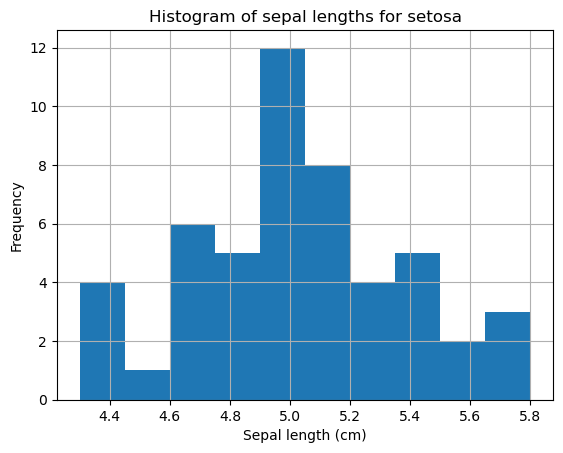

In [102]:
# Set the plant label
plant_label = 0 # Iris-Setosa

# Create a histogram of the sepal lengths for the specified plant
fig, ax = plt.subplots()
iris_df[feat][iris_df['label'] == plant_label].hist(ax=ax)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Frequency')
ax.set_title(f"Histogram of sepal lengths for {iris_dataset.target_names[plant_label]}")
plt.show()

**Scatter plots** are used to visualize the relationship between two variables. Each dot in the plot represents a single data point, with its position determined by the values of its two attributes. Such plots can help us explore how the various features differ among the different plants.

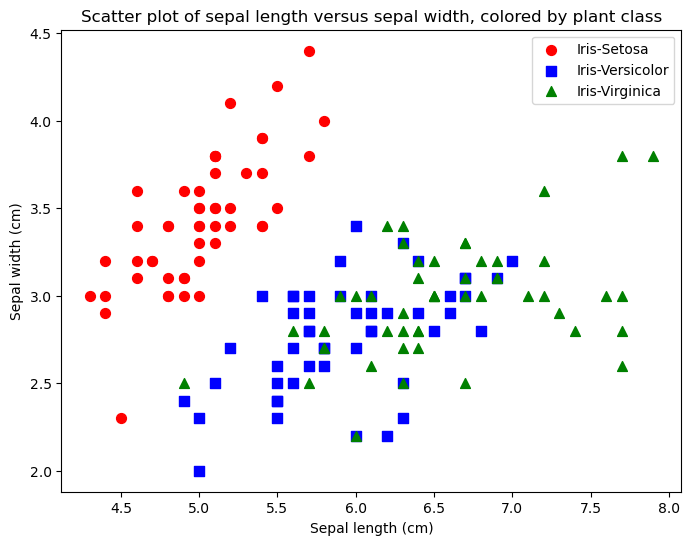

In [103]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=iris_df[iris_df['label'] == 0]['sepal length (cm)'], y=iris_df[iris_df['label'] == 0]['sepal width (cm)'], 
           color='red', label='Iris-Setosa', s=50, marker='o')

ax.scatter(x=iris_df[iris_df['label'] == 1]['sepal length (cm)'], y=iris_df[iris_df['label'] == 1]['sepal width (cm)'], 
           color='blue', label='Iris-Versicolor', s=50, marker='s')

ax.scatter(x=iris_df[iris_df['label'] == 2]['sepal length (cm)'], y=iris_df[iris_df['label'] == 2]['sepal width (cm)'], 
           color='green', label='Iris-Virginica', s=50, marker='^')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatter plot of sepal length versus sepal width, colored by plant class')

ax.legend()

plt.show()

Pandas can actually create these plots for us for each pair of features in the data frame. We color the dots by their label using `c = iris_df['label']`.

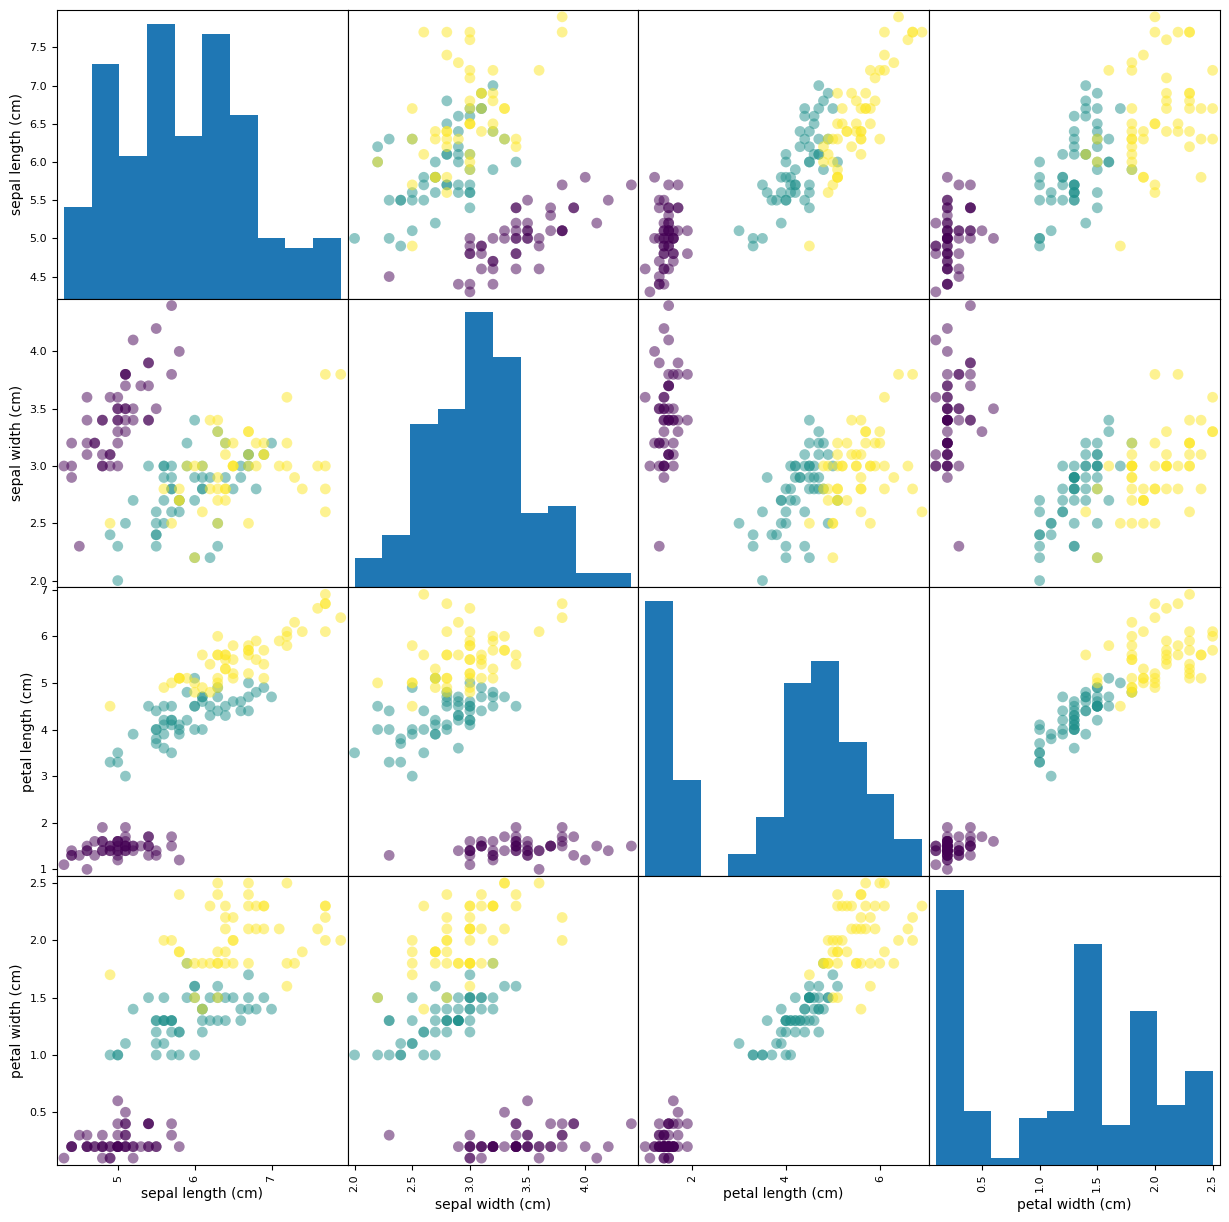

In [104]:
pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()

As we can observe, the colors (representing different Iris species) are quite distinct from each other.
 **To successfully train a machine learning model to distinguish the classes, therefore, seems promising!**

Another effective way to visualize pairwise relationships in a dataset is to use pair plots. Seaborn provides an efficient tool for this called `pairplot`.


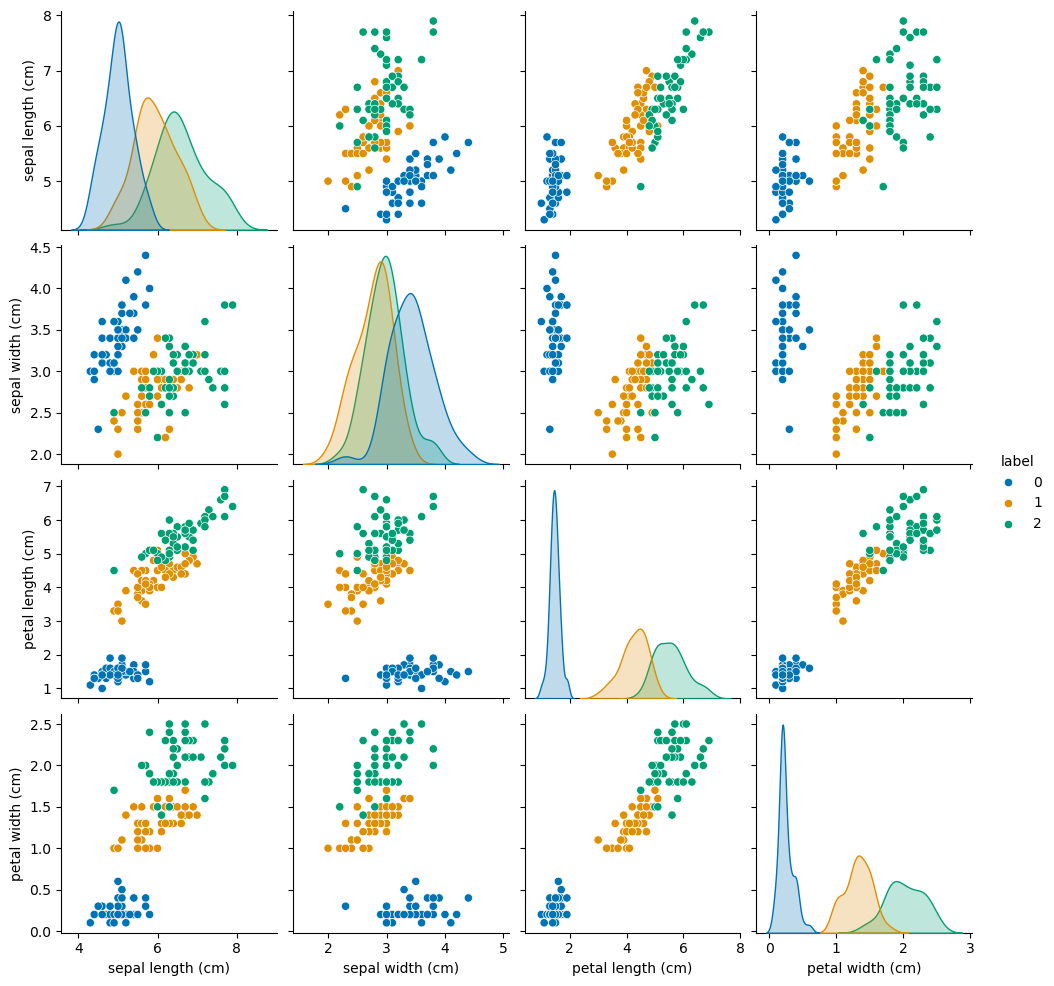

In [105]:
import seaborn as sns
sns.pairplot(iris_df, hue='label', palette="colorblind")
plt.show()

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, which we can exploit when constructing predictive machine learning models. 

> More generally, **exploratory data analysis** using **plots**, **visualizations**, **statistics**, **probability**, and **baseline models** is a core part of all practical machine learning projects. We'll see that again and again throughout the course.

> **Your turn!** To get a feeling for the many different ways you can visualize data, have a quick look at the example gallery of the Python library `seaborn`: https://seaborn.pydata.org/examples/index.html. Feel free to play around with the examples. Here's a guide to the plotting features of Pandas, also worth a look: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. You'll make use of these throughout the course.

> **Challenge:** Choose one plot from the Seaborn gallery that you find interesting. Try to recreate it using the Iris dataset. What insights can you draw from this new visualization?

You've now seen how visualizing your data can not only help in understanding it better but also in identifying patterns and relationships that can be critical when building predictive models. With a good grasp of our data's structure and relationships, we're well-prepared to continue!

## Feature engineering / selecting features to use

Feature engineering is the process of selecting, transforming, or creating the most relevant variables (or "features") to improve the performance of our machine learning models. It's a craft that's equal parts art and science, requiring domain knowledge, intuition, and a good understanding of the data.


We can choose to train a model on one or more of the features. Let's use `sepal length` and `sepal width`:

In [106]:
# We select the 0'th and 1'st columns since these correspond to sepal length and width:
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

In [107]:
X.shape

(150, 2)

We now have access to two measurements (sepal length and width) for 150 flowers. From these features stored in X, our model should predict the correct label y.

> We're only using two of the four features to construct our predictive models for demonstration purposes. While all the features could provide more information, simplifying our dataset will allow us to better illustrate certain modeling concepts. You'll see why when we try using all four features later.


Here are the first five measurements and their corresponding labels:

In [108]:
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [109]:
print(y[:5])

[0 0 0 0 0]


As a reminder from our earlier discussions, 0 corresponds to Iris-Setosa, 1 to Iris-Versicolor, and 2 to Iris-Virginica. (Also, remember that Python lists and arrays are indexed starting from 0.)

In [110]:
list(zip(range(len(y)), iris_dataset['target_names']))

[(0, np.str_('setosa')), (1, np.str_('versicolor')), (2, np.str_('virginica'))]

> Note that data preparation in general, and what's called **feature engineering** in particular, is one of the most critical, time-consuming, and challenging parts of applied machine learning (yet often underappreciated). In fact, the actual modeling work in applied machine learning is a very minor part of real-world machine learning systems development.

> Most of the time (and code) in machine learning projects is spent on tasks such as collecting data, cleaning data, and especially designing effective features. A well-engineered feature can sometimes make the difference between a poorly performing model and a highly accurate one.

> **Your turn!** Consider the other features we didn't use - petal length and petal width. How might including these influence our model? 

# Training and test data

We're building a machine learning model that should be able to predict Iris species for *new measurements*. To *simulate* such measurements, we leave out a set of data when constructing the model and use it to test the model. This set is called a **test set**. 

If we train the model using all the data, there's a risk it might overfit, essentially "remembering" the data rather than learning from patterns. This can lead to poor predictions on *new* data. It will be bad at **generalization**. 

We use **training data to construct the model** and **test data to evaluate the model**.

Scikit-learn has a convenient `train_test_split` function that we'll use to set aside 25% of our data (including the corresponding labels) to be used as test data: 

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (112, 2)
Test data: (38, 2)


Let's collect the training data in a dataframe and display it:

In [114]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'][0:2])

In [115]:
iris_df.head(10)

,sepal length (cm),sepal width (cm)
0,5.0,3.6
1,5.2,4.1
2,5.8,2.7
3,6.0,3.4
4,6.7,3.1
5,5.4,3.9
6,5.4,3.7
7,5.5,2.4
8,6.3,2.8
9,6.4,3.1


...same with the test data

In [116]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset['feature_names'][0:2])
iris_df_test.head(10)

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8
5,5.4,3.4
6,5.6,2.9
7,6.9,3.1
8,6.2,2.2
9,5.8,2.7


# Machine learning model

There are many different machine learning models available for classification tasks.

One of the most versatile and powerful models in the machine learning landscape are the tree-based models, particularly **random forests**, which are ensembles of **decision trees**. You can read about random forests here: http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees, and about decision trees here: http://scikit-learn.org/stable/modules/tree.html. 

We'll talk much more about these models later in the course. For now, we'll use random forests as "black boxes" without further explanation:

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

Classification models in scikit-learn are Python classes and always come with `fit` and `predict` methods. `fit` is used to adapt the model to the data (i.e., *train* the model), while `predict` is used to produce predictions.

Think of `fit` as a way to teach the model about the patterns in your data and `predict` as a way for the model to apply that learned knowledge.

In [119]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


As you see, there are a bunch of parameters to choose in a `RandomForestClassifier`: 

In [120]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Evaluate the model

In [121]:
y_pred = rf.predict(X_test)

The model has now made predictions on the test data, and we can check how well it performed. 

A simple and intuitive metric to gauge model performance is *accuracy*. It measures the proportion of correct predictions out of the total predictions made.

Throughout the course, we'll learn about many other ways to evaluate machine learning models.

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy_score(y_test, y_pred)

0.7894736842105263

> **Your turn!**
- You can also use `rf.score` to find the accuracy. Try that.
- Try to change the default parameters in `RandomForestClassifier`. Can you get a better accuracy? Hint: try increasing `n_estimators`. We'll learn about what the parameters mean later in the course.
- Try to use all four features in the model (petal and sepal lengths and widths). How does the random forest perform?
- Experiment with other classifiers in `scikit-learn`: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning. For a start, try the `SGDClassifier`. Remember to import it first with: `from sklearn.linear_model import SGDClassifier`. Observe how performance changes with different models.

## All the code gathered

Here's the code we used to load the data, select features, split into train and test sets, train a model, predict and evaluate. 

It's a testament to the power and simplicity of Python libraries like `scikit-learn` that complex processes like training a machine learning model can be accomplished in just a few lines of code.


In [124]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

# Another example

After exploring the Iris dataset, let's delve into another commonly used dataset in the machine learning community: the **Diabetes Data Set**.


## Load, explore and prepare the data

We repeat the above procedure on another benchmark data set: the Diabetes Data Set. You'll find a description of the data set together with a link to the data here:  https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. It aims to predict the onset of diabetes based on certain diagnostic measures.


As usual, we'll use Pandas to inspect and process tabular data:

In [125]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
diabetes = pd.read_csv(url)

In [126]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
len(diabetes)

768

Upon inspection, the dataset consists of eight feature columns and one target column indicating the presence (1) or absence (0) of diabetes.

More information about the data can be found using `describe` and `info`:

In [128]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

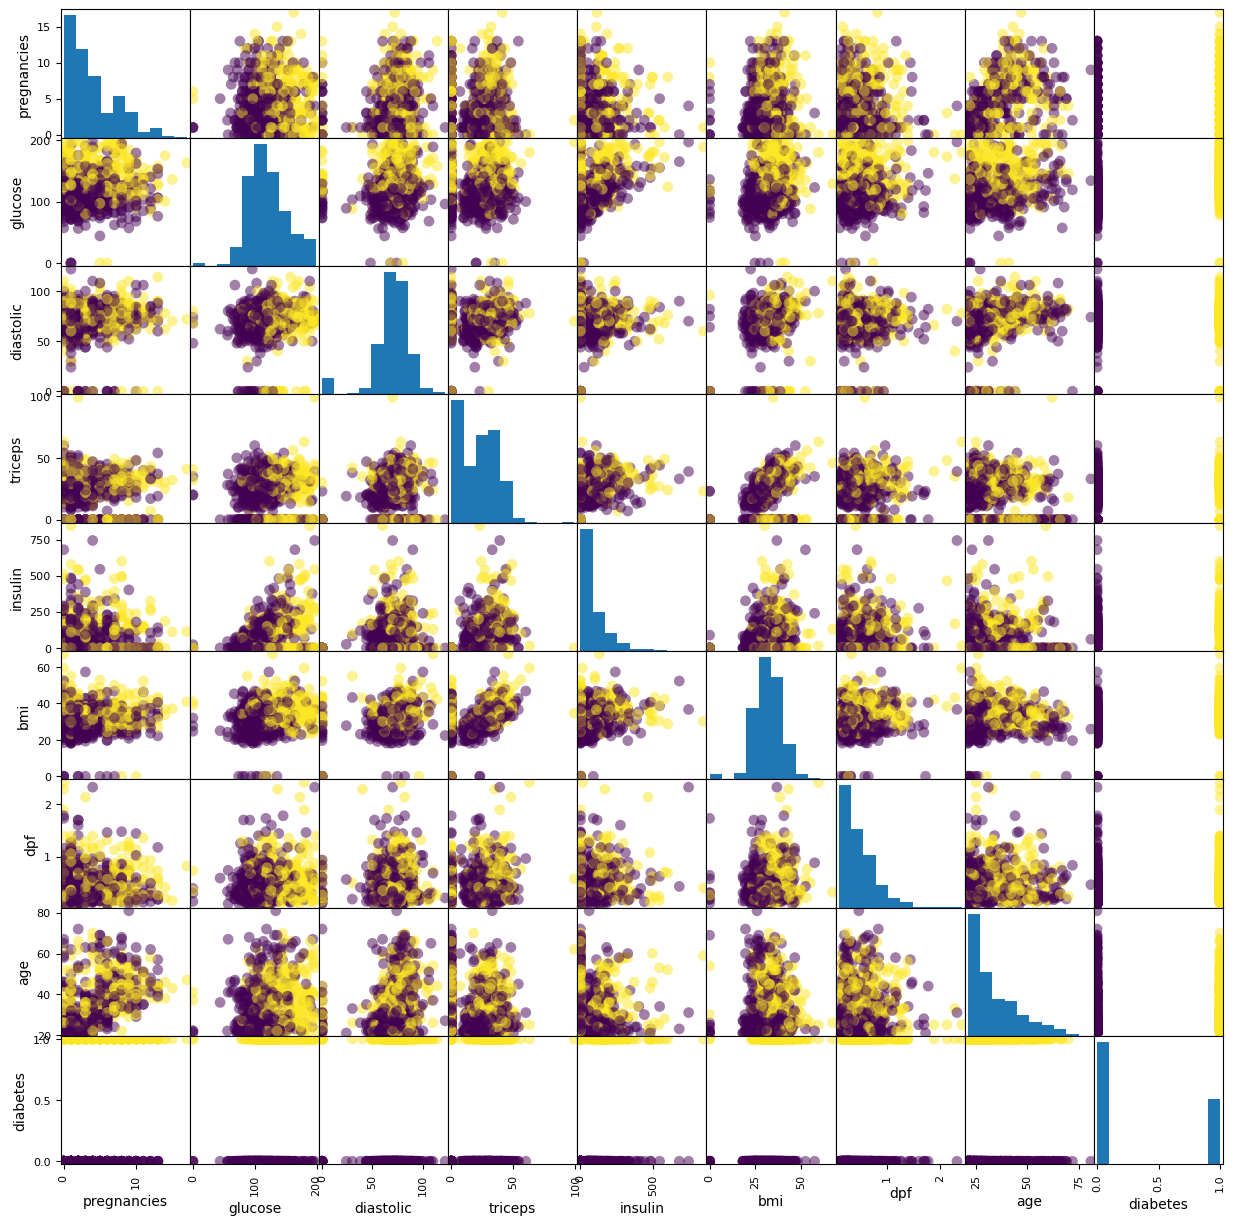

In [130]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

From the visualization, it's evident that distinguishing between diabetic and non-diabetic samples is more challenging compared to distinguishing Iris species.

Still, let's follow the same procedure: 

### Select which features to use

... this time we'll use all the features to construct our model. We let `X` consist of all columns except `diabetes`:

In [131]:
X = diabetes[diabetes.columns[0:-1]]           
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [132]:
y = diabetes['diabetes']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

### Training and test data

We split into training and test sets:

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

... and train a random forest model:

In [134]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) 
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Evaluate the model

Now we can make predictions on the test set and compute the accuracy:

In [136]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7395833333333334

With this model we can predict diabetes from the given features with an accuracy of 73%.

# Machine learning models are highly generic!

> **Key Observation!** The methodology we employed for the diabetes data mirrors our approach with the Iris dataset, underlining the generality and adaptability of machine learning models. 

In [137]:
# Load the data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

In [138]:
# Load the data
diabetes = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7395833333333334

**The essence of the process remains unchanged, emphasizing that the foundational steps in training machine learning models are consistent across datasets.** 


> **Machine learning models are generic: the same model can be used for many different tasks!**

# Diving Deeper: Understanding the Model's Predictions

Understanding the predictions and workings of machine learning models is vital. Not only does it allow for improvements in model performance, but it also promotes trust in the model's decisions. For our diabetes classifier, which features weigh heavily for our model's prediction of whether someone has diabetes? How does our model interpret the relationship between BMI and diabetes?

## Feature importance

Random forests can provide a measure called **feature importance** which reveals the significance of each feature in making predictions.

In [139]:
importances = rf.feature_importances_
importances

array([0.0741018 , 0.27902493, 0.08882679, 0.07199999, 0.07071473,
       0.15804992, 0.11831399, 0.13896785])

To present these importances in descending order:

In [140]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


Visualizing these:

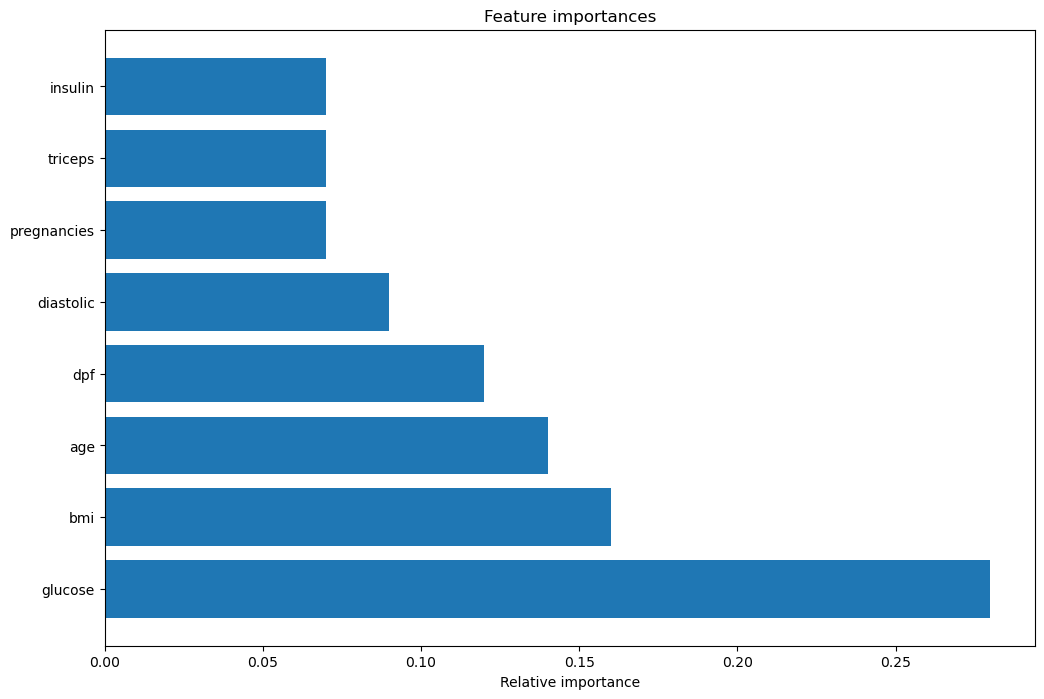

In [141]:
# Set the figure size and the number of decimal places to round the importances to
fig_size = (12, 8)
decimals = 2

# Create the horizontal bar plot of feature importances
f, ax = plt.subplots(figsize=fig_size)
plt.barh(X.columns[indices], np.round(importances[indices], decimals))
ax.set_xlabel("Relative importance")
ax.set_title("Feature importances")
plt.show()

The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is beneficial in practice! 

Although glucose level and BMI seem to have the most significant influence, it's crucial to note that interpreting feature importance requires caution. The importance in scikit-learn's random forests is based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). However, relying solely on these can be misleading. A comprehensive examination on this issue can be found [here](https://explained.ai/rf-importance/index.html).

A more reliable technique is **permutation importance**.

## Permutation importance

The idea behind permutation importance is that if a feature is important for the predictions of a trained model, then a random shuffling of the data in the corresponding column should drastically reduce the model's accuracy. On the other hand, a random shuffling of an unimportant feature (for a given trained model) shouldn't impact the model much. 

In [142]:
# Import the permutation_importance function
from sklearn.inspection import permutation_importance

# Calculate feature importances using permutation importance
n_repeats = 30
random_state = 0
r = permutation_importance(rf, X_test, y_test,
                            n_repeats=n_repeats,
                            random_state=random_state)

Here are the results:

In [143]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<8}"
    f"{r.importances_mean[i]:.3f}"
    f" +/- {r.importances_std[i]:.3f}")

glucose 0.104 +/- 0.027
dpf     0.020 +/- 0.017
bmi     0.018 +/- 0.021
insulin 0.014 +/- 0.011
age     0.004 +/- 0.020
pregnancies-0.003 +/- 0.014
diastolic-0.005 +/- 0.011
triceps -0.008 +/- 0.009


...and as a plot:

/var/folders/1g/_4x26lps6mgg1tr73d7g2bmh0000gp/T/ipykernel_20474/1986279622.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


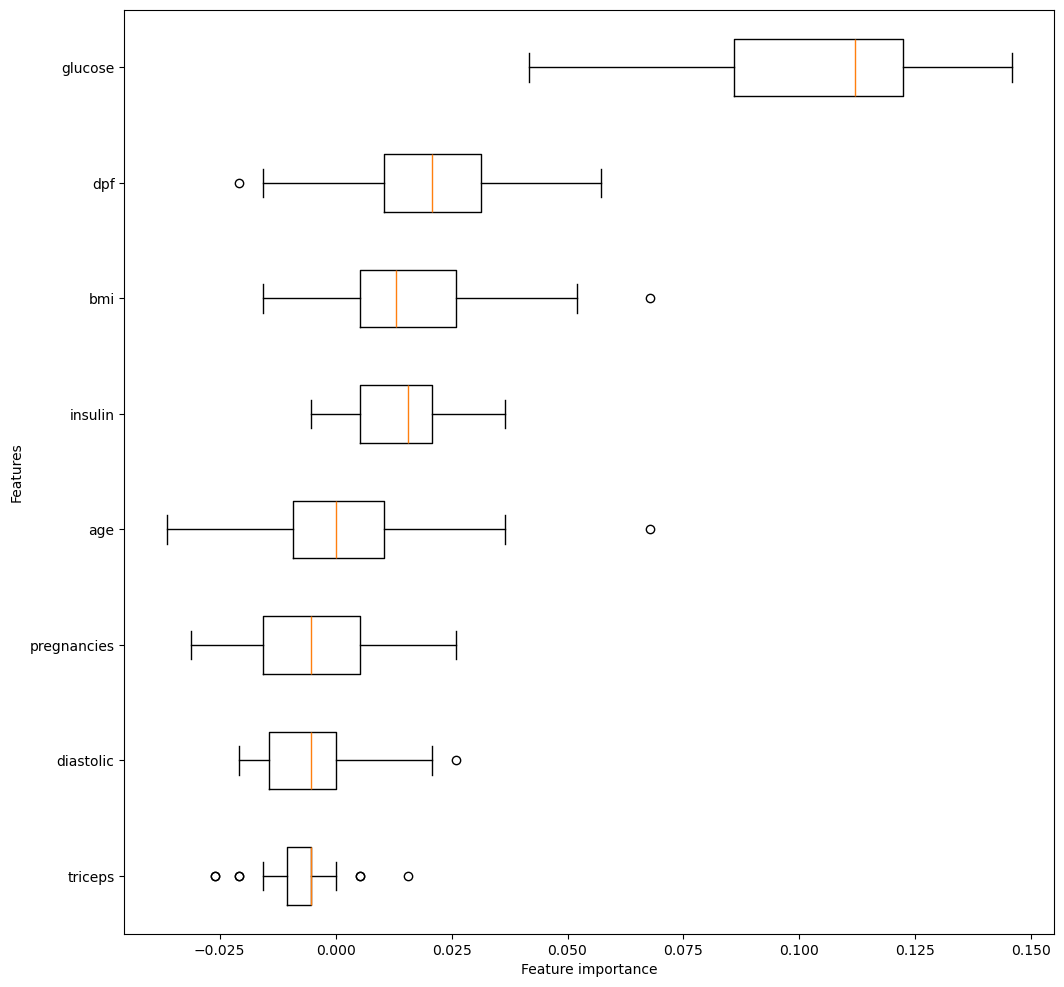

In [144]:
# Get the sorted indices of the features according to mean importance
r_sorted_idx = r.importances_mean.argsort()

# Set the figure size
fig_size = (12, 12)

# Create a boxplot
fig, ax = plt.subplots(figsize=fig_size)
ax.boxplot(
    r.importances[r_sorted_idx].T,
    vert=False,
    labels=X_test.columns[r_sorted_idx],
)

# Add axis labels
plt.xlabel('Feature importance')
plt.ylabel('Features')

plt.show()

We observe that `glucose` is the most important feature by far. If you shuffle `glucose`, the model accuracy decreases by more than ten percentage points. The four features with negative weights were useless for the predictions: if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

A natural question to ask is, "If the glucose level increases, does the predicted probability for diabetes increase or decrease?". Or is there a more complicated connection between the two?

We can (partly) uncover this by using partial dependence plots.

## Partial Dependence Plots (PDP)

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability of diabetes as the glucose level increases? As this is an important feature, we expect it to change quite a bit (in fact, since we're talking about diabetes, we expect the probability to increase). And what about unimportant features like age? 

For `glucose`:

/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


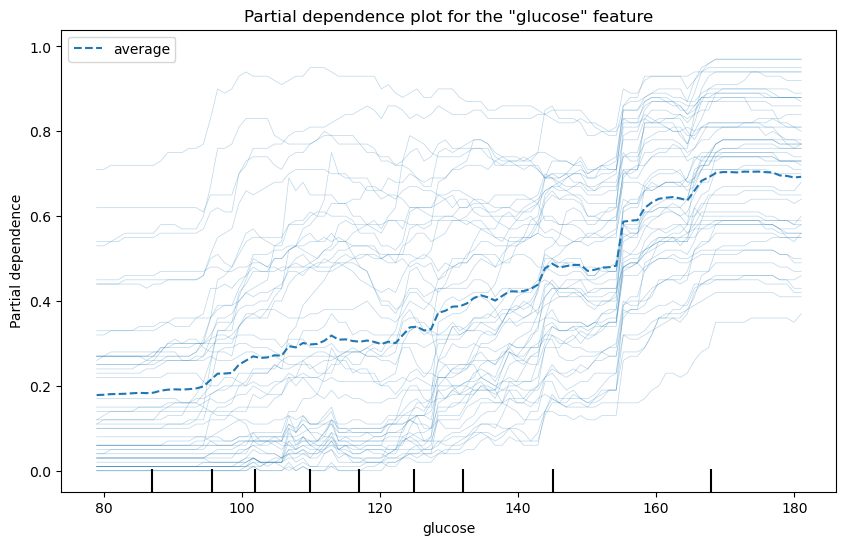

In [145]:
# Import the PartialDependenceDisplay function
from sklearn.inspection import PartialDependenceDisplay

# Set the figure size
fig_size = (10, 6)

# Create a plot of partial dependence for the 'glucose' feature
f, ax = plt.subplots(figsize=fig_size)
PartialDependenceDisplay.from_estimator(rf, X_train, ['glucose'], kind='both', subsample=50,
                                       ax=ax)

# Add a title to the plot
plt.title('Partial dependence plot for the "glucose" feature')

plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

What about `BMI`?

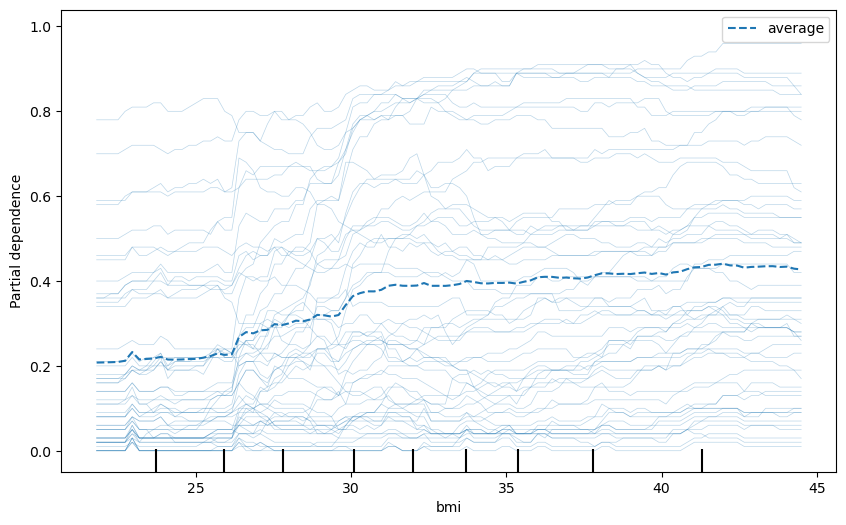

In [146]:
f, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['bmi'], kind='both', subsample=50,
                                       ax=ax)
plt.show()

Same for BMI. The plot for age indicates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it flattens out. 

What about `age`?

/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


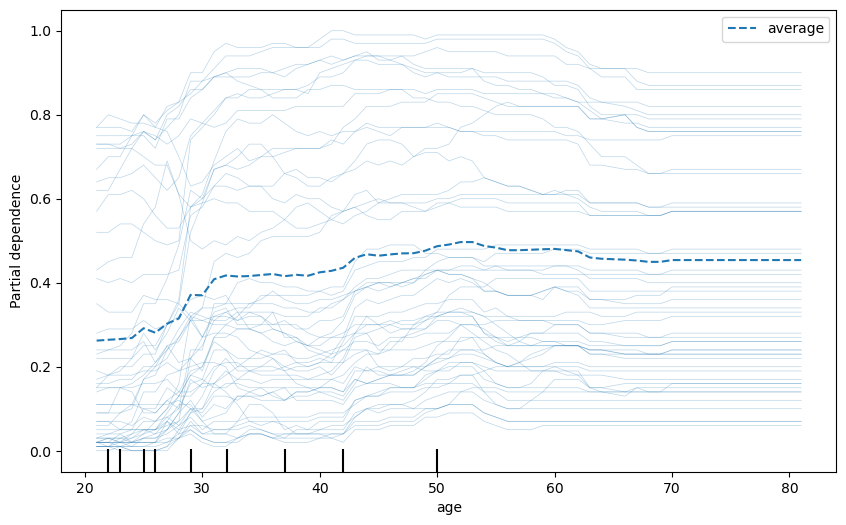

In [147]:
f, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['age'], kind='both',  subsample=50, 
                                       ax=ax)
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots, one can get a better understanding of how the features affect the predictions.

> **Warning:** This takes a while to run!

In [148]:
#f, ax = plt.subplots(figsize=(12,8))
#PartialDependenceDisplay.from_estimator(rf, X_train, [('glucose', 'bmi')], kind='average',  subsample=50, 
#                                        ax=ax)
#plt.show()

> **IMPORTANT:** It's worth noting that these insights are contingent on the dataset we've used, the model, and the approach to measure feature importance. Meaningful conclusions about the actual relationships between diabetes, glucose, BMI, age, etc., would require rigorous datasets and investigations.

# Exercises

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information to the model?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature importances?
- Based on the feature importances and permutation importances you've calculated, which features would you consider removing or keeping for a subsequent model iteration?
- Using the partial dependence plots, describe the relationship between glucose levels and the likelihood of having diabetes. Is this consistent with your prior expectations?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time, you will predict a car's country of origin using various features.
- **Kaggle competition**: Try out what you've learned here (and elsewhere) in our "Getting started" Kaggle competition. See the course website at MittUiB for details.

> Now that we've covered some fundamentals, let's have a first look at how we can turn machine learning models into machine learning powered applications. 

# Creating a simple web app

To visualize and interact with our diabetes classifier, we'll create a basic web application. For this, we'll use the `Gradio` library. 

> Gradio is a Python library that allows you to quickly create customizable UI components around your machine learning models, making it easy to show them off to others. We'll study this in much more detail later in the course. In the meantime, you can read more about Gradio here: https://www.gradio.app/.

## Create a prediction function

We've previously trained our diabetes prediction model, which we've named `rf`. Now, let's construct a function that takes the input features and returns the model's prediction.

In [149]:
def predict_diabetes(age, bmi, glucose):
    """
    Predicts whether a person is diabetic or non-diabetic based on their age, BMI, and glucose level.
    
    Args:
        age (float): The person's age in years.
        bmi (float): The person's body mass index (BMI).
        glucose (float): The person's glucose level in mg/dL.
        
    Returns:
        str: "Diabetic" if the person is predicted to be diabetic, "Non-diabetic" otherwise.
    """
    
    # Use the mean values for the unused features
    mean_insulin = diabetes.insulin.mean()
    mean_dpf = diabetes.dpf.mean()
    mean_pregnancies = diabetes.pregnancies.mean()
    mean_triceps = diabetes.triceps.mean()
    mean_diastolic = diabetes.diastolic.mean()

    # Reshape the input data for prediction
    input_data = np.array([mean_pregnancies, glucose, mean_diastolic, mean_triceps, 
                           mean_insulin, bmi, mean_dpf, age]).reshape(1, -1)
    
    # Get the prediction
    prediction = rf.predict(input_data)
    
    # Return the result
    return "Diabetic" if prediction[0] == 1 else "Non-diabetic"

> Note: For the sake of this demonstration, we're using just three features (`age`, `bmi`, and `glucose`). Typically, you'd want to use all the relevant features your model was trained on.

## Setting up a Gradio interface

With our prediction function in place, we'll set up the Gradio interface for our model. We can customize our input fields—using sliders for numerical values such as age, bmi, and glucose, for instance.

In [150]:
if (colab or kaggle):
    %pip install gradio

In [151]:
import gradio as gr

In [152]:
# Set the minimum, maximum, and default values for the sliders
age_min, age_max, age_default = 0, 100, 30
bmi_min, bmi_max, bmi_default = 15, 50, 25
glucose_min, glucose_max, glucose_default = 0, 200, 100

# Create the interface
iface = gr.Interface(
    fn=predict_diabetes, 
    inputs=[
        gr.components.Slider(minimum=age_min, maximum=age_max, value=age_default, label="Age"),
        gr.components.Slider(minimum=bmi_min, maximum=bmi_max, value=bmi_default, label="BMI"),
        gr.components.Slider(minimum=glucose_min, maximum=glucose_max, value=glucose_default, label="Glucose Level")
    ], 
    outputs=gr.components.Textbox(label="Prediction"),
    title="Diabetes Predictor",
    description="""Enter your age, BMI, and glucose level to predict whether you are diabetic or non-diabetic.
    Data source: Pima Indians Diabetes Database; Model: Random Forest Classifier""",
)

# Launch the interface
iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Missing file: /Users/arvid/.cache/huggingface/gradio/frpc/frpc_darwin_arm64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_darwin_arm64
2. Rename the downloaded file to: frpc_darwin_arm64_v0.3
3. Move the file to this location: /Users/arvid/.cache/huggingface/gradio/frpc


/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio/flagged/dataset1.csv


Executing this code initializes and launches a web interface. You'll be presented with sliders corresponding to Age, BMI, and Glucose Level. Once you adjust these values, hitting the "Submit" button will display whether the model predicts the input set to be indicative of diabetes.

To conclude your testing, simply close the browser tab. If you're executing the code in a terminal, pressing `Ctrl+C` will also terminate the interface.